In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/PGP Datasets/news.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [ ]:
data.shape

(6335, 4)

In [ ]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words='english',max_features=1000)
print(vec)

CountVectorizer(max_features=1000, stop_words='english')


In [ ]:
vec.fit(data['title'])

CountVectorizer(max_features=1000, stop_words='english')

In [ ]:
vec.vocabulary_

{'hillary': 409,
 'fear': 325,
 'watch': 959,
 'moment': 574,
 'paul': 638,
 'ryan': 762,
 'political': 663,
 'suicide': 848,
 'trump': 902,
 'rally': 711,
 'video': 932,
 'kerry': 469,
 'paris': 632,
 'bernie': 90,
 'supporters': 852,
 'twitter': 912,
 'dnc': 256,
 'tried': 896,
 'warn': 953,
 'battle': 85,
 'new': 596,
 'york': 997,
 'primary': 686,
 'matters': 547,
 'usa': 921,
 'left': 495,
 'fact': 314,
 'check': 148,
 'clinton': 170,
 'chief': 151,
 'iran': 439,
 'reportedly': 730,
 'makes': 534,
 'push': 702,
 'nuclear': 606,
 'talks': 865,
 'clintons': 171,
 'iowa': 438,
 'campaign': 124,
 'donald': 264,
 'delegate': 235,
 'game': 362,
 'got': 381,
 'worse': 989,
 'strong': 840,
 'solar': 810,
 'storm': 834,
 'today': 888,
 'news': 597,
 '2016': 10,
 '10': 1,
 'ways': 962,
 'america': 48,
 'preparing': 677,
 'world': 988,
 'war': 951,
 'takes': 861,
 'cruz': 210,
 'women': 982,
 'lead': 486,
 'shocking': 796,
 'obama': 607,
 'caught': 135,
 'huge': 421,
 'trouble': 900,
 'sick'

In [ ]:
x1=vec.fit_transform(data['title']).todense()
x2=vec.fit_transform(data['text']).todense()

In [ ]:
x1

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
data_matrix=np.hstack((x1,x2))

In [ ]:
data_matrix

matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(data_matrix)

[[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
target=data['label']
target

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [ ]:
# alternate way of preparing a document term matrix
# TFIvectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvec=TfidfVectorizer(stop_words='english',max_features=1000)
x1f=tfvec.fit_transform(data['title'])
x2f=tfvec.fit_transform(data['text'])

In [ ]:
print(x1f)

  (0, 325)	0.8862413751862188
  (0, 409)	0.46322373094223046
  (1, 932)	0.2593784260489239
  (1, 711)	0.3646752242748013
  (1, 902)	0.16085175796470028
  (1, 848)	0.42362944915397954
  (1, 663)	0.31920903052960303
  (1, 762)	0.34531908039053155
  (1, 638)	0.31683000040301823
  (1, 574)	0.39999969468449514
  (1, 959)	0.3359746081375647
  (2, 632)	0.6694502749847747
  (2, 469)	0.7428568700111815
  (3, 953)	0.4576753969077527
  (3, 896)	0.4383784689042647
  (3, 256)	0.3995454223648611
  (3, 912)	0.42367105394850657
  (3, 852)	0.38054547373530834
  (3, 90)	0.33824397259892114
  (4, 547)	0.5313963709567713
  (4, 686)	0.4393708352479313
  (4, 997)	0.4696539461800522
  (4, 596)	0.30872774861393276
  (4, 85)	0.45681890738101644
  (5, 921)	1.0
  :	:
  (6329, 66)	0.4178187358175385
  (6329, 973)	0.34713937094857994
  (6329, 124)	0.29532550530926766
  (6329, 170)	0.20189222156778502
  (6329, 896)	0.44768154635954077
  (6330, 245)	0.5734568990000666
  (6330, 286)	0.4727727031814683
  (6330, 771)	0

In [ ]:
x1f=tfvec.fit_transform(data['title']).todense()
x2f=tfvec.fit_transform(data['text']).todense()

In [ ]:
tf_matrix=np.hstack((x1f,x2f))
tf_matrix

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.03729987,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
#data_matrix, target
#tf_matrix, target

In [ ]:
#Count Vectorizer
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_matrix,target,random_state=100)

In [ ]:
#build the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')

In [ ]:
#train the model
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


DecisionTreeClassifier(criterion='entropy')

In [ ]:
#test the model
y_pred=model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [ ]:
y_test

5438    FAKE
2071    FAKE
1383    REAL
5608    FAKE
3905    FAKE
        ... 
6227    FAKE
1626    REAL
3141    REAL
2982    REAL
4764    REAL
Name: label, Length: 1584, dtype: object

In [ ]:
#compute the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_pred,y_test)
print("Accuracy:",score*100)

Accuracy: 79.10353535353535


In [ ]:
confusion_matrix(y_pred,y_test)

array([[629, 168],
       [163, 624]])

In [ ]:
# Repeat for TF Matrix

In [ ]:
x_traintf,x_testtf,y_traintf,y_testtf=train_test_split(tf_matrix,target,random_state=100)
model_tf=DecisionTreeClassifier(criterion='entropy')
model_tf.fit(x_traintf,y_traintf)
y_predtf=model_tf.predict(x_testtf)
score_tf=accuracy_score(y_predtf,y_testtf)
print("Score:",score_tf*100)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Score: 80.99747474747475


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[Text(0.7762704823583766, 0.9915254237288136, 'X[1753] <= 0.007\nentropy = 1.0\nsamples = 4751\nvalue = [2372, 2379]'),
 Text(0.6130370409499369, 0.9745762711864406, 'X[1019] <= 0.007\nentropy = 0.953\nsamples = 3225\nvalue = [2021, 1204]'),
 Text(0.5205387679985286, 0.9576271186440678, 'X[1780] <= 0.065\nentropy = 1.0\nsamples = 2126\nvalue = [1041, 1085]'),
 Text(0.4827815718714966, 0.940677966101695, 'X[1882] <= 0.238\nentropy = 0.962\nsamples = 1433\nvalue = [881, 552]'),
 Text(0.4791941279253083, 0.923728813559322, 'X[1797] <= 0.007\nentropy = 0.944\nsamples = 1381\nvalue = [881, 500]'),
 Text(0.46242413029007845, 0.9067796610169492, 'X[1075] <= 0.06\nentropy = 0.928\nsamples = 1337\nvalue = [878, 459]'),
 Text(0.43964646685818387, 0.8898305084745762, 'X[1188] <= 0.055\nentropy = 0.948\nsamples = 1243\nvalue = [788, 455]'),
 Text(0.4156158036715247, 0.8728813559322034, 'X[1141] <= 0.06\nentropy = 0.965\nsamples = 1150\nvalue = [701, 449]'),
 Text(0.3890791409753363, 0.855932203389

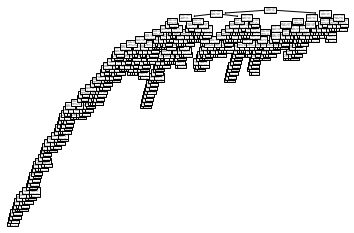

In [ ]:
from sklearn import tree
tree.plot_tree(model_tf)

In [ ]:
from sklearn.tree import export_graphviz # Preparing a graph - formatting tree
from io import StringIO
from IPython.display import Image
import pydotplus
feature_cols=vec.get_feature_names()
out_dat=StringIO()

export_graphviz(model_tf,out_file=out_dat,filled='True',class_names=['0','1'],rounded='True')

graph=pydotplus.graph_from_dot_data(out_dat.getvalue())

graph.write_png("d1.png")

Image(graph.create_png())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
